In [1]:
# General modules
import os

# Data wrangling
import numpy as np
import pandas as pd
import collections
import matplotlib.pyplot as plt 

# Image processing
from PIL import Image
import zegamiML

# Dimensionality reduction
from sklearn.decomposition import PCA 
from sklearn.manifold import MDS, TSNE, Isomap
from sklearn.preprocessing import scale
import umap

# Clustering
from scipy.spatial import distance_matrix
from sklearn.cluster import KMeans, MeanShift, DBSCAN
import hdbscan
from scipy.cluster.hierarchy import dendrogram, linkage

/home/kzkedzierska/miniconda3/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/home/kzkedzierska/miniconda3/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
zt = pd.read_csv("iris.tsv", sep = "\t", header = 0)
zt.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
data = np.array(zt.iloc[:,0:4])

In [4]:
analysis_types = ['PCA', 'MDS', 'tSNE', 'umap', "Isomap"]

def plot_all(df_with_coord, labels = None, types = analysis_types):
    fig = plt.figure(figsize = (25, 5))
    for i in range(0, len(types)):
        analysis_type = types[i]
        # plotting
        plt.subplot(1, len(types), i + 1)
        if labels is not None:
            plt.scatter(df_with_coord['x_' + analysis_type], 
                        df_with_coord['y_' + analysis_type], 
                        c = labels)
        else:
            plt.scatter(df_with_coord['x_' + analysis_type], 
                        df_with_coord['y_' + analysis_type])
        plt.title(analysis_type)
    return fig

def reduce_dim(data, zt_in, types = analysis_types):
    zt_out = zt_in
    for i in range(0, len(types)):
        analysis_type = types[i]
        reduced_df = zegamiML.reduce_dimensions(data, analysis_type = analysis_type)
        # merge input and reduced data frames
        zt_out['x_' + analysis_type] = reduced_df.iloc[:,0] 
        zt_out['y_' + analysis_type] = reduced_df.iloc[:,1] 
    
    return zt_out

/home/kzkedzierska/miniconda3/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


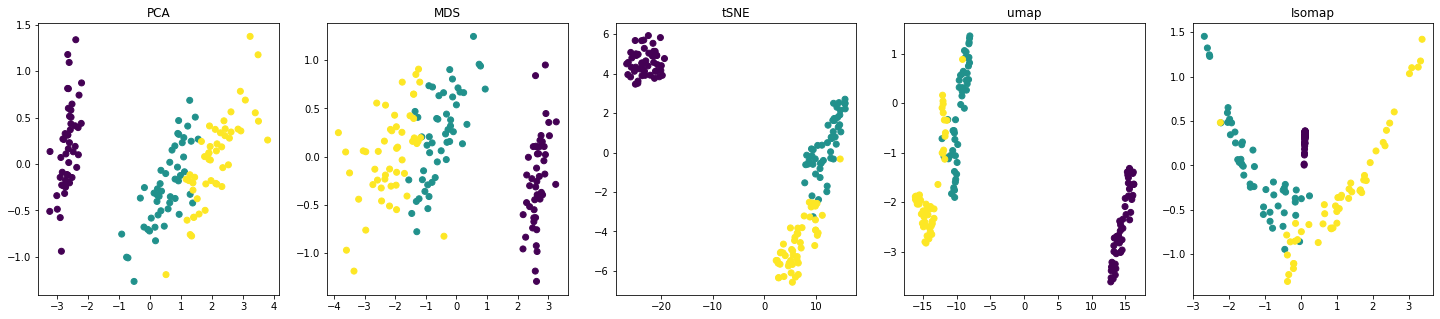

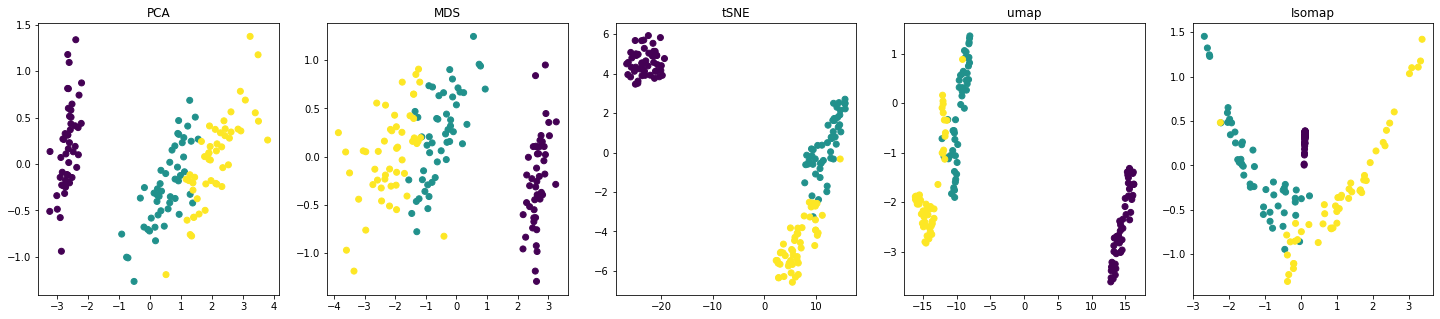

In [5]:
zt_out = reduce_dim(data, zt)
lbsl, sth = pd.factorize(zt_out['Species'])
plot_all(zt_out, labels = lbsl)

In [ ]:
zt_out